In [6]:
##importing all pandas into code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
##import image to describe how data can be joined

from PIL import Image
from IPython.display import display

In [8]:
##function that helps us remove the NA/missing values within the datasets
data = {'col1': [1, 2, np.nan, 4], 'col2': [5, np.nan, 7, 8]}
df = pd.DataFrame(data)

print(df)
print(df.isna())

   col1  col2
0   1.0   5.0
1   2.0   NaN
2   NaN   7.0
3   4.0   8.0
    col1   col2
0  False  False
1  False   True
2   True  False
3  False  False


       OID_  NRI_ID  STATE  STATEABBRV  STATEFIPS  COUNTY  COUNTYTYPE  \
0     False   False  False       False      False   False       False   
1     False   False  False       False      False   False       False   
2     False   False  False       False      False   False       False   
3     False   False  False       False      False   False       False   
4     False   False  False       False      False   False       False   
...     ...     ...    ...         ...        ...     ...         ...   
1442  False   False  False       False      False   False       False   
1443  False   False  False       False      False   False       False   
1444  False   False  False       False      False   False       False   
1445  False   False  False       False      False   False       False   
1446  False   False  False       False      False   False       False   

      COUNTYFIPS  STCOFIPS  TRACT  ...  WNTW_EALS  WNTW_EALR  WNTW_ALRB  \
0          False     False  False  ...      Fals

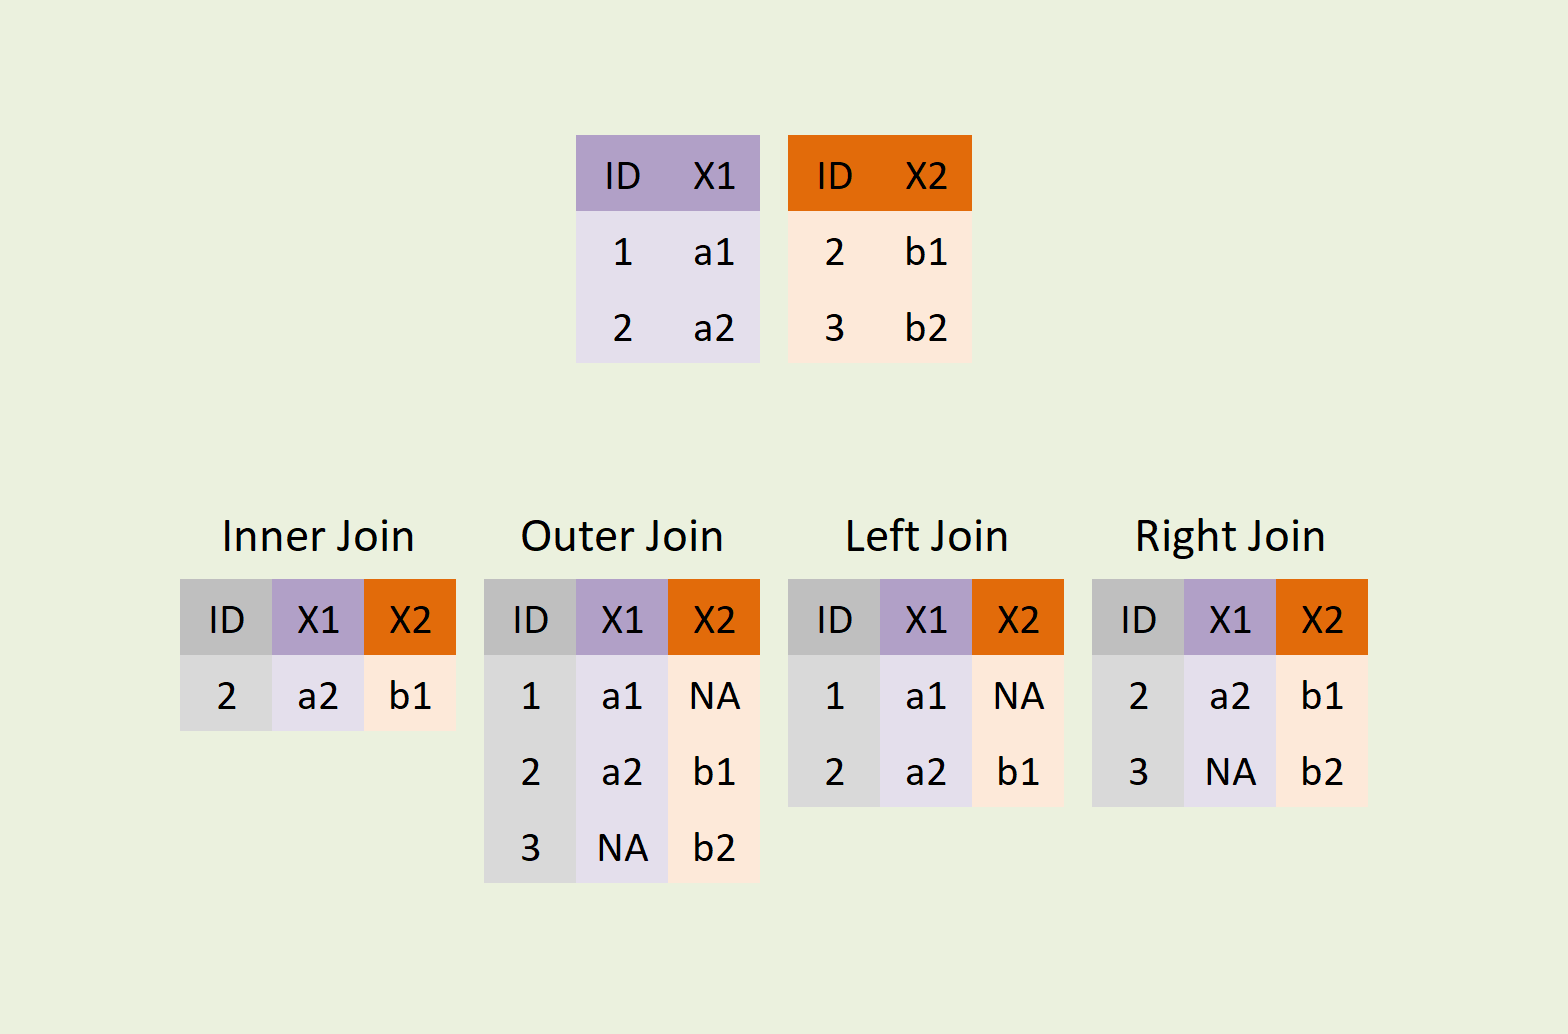

In [11]:
#### Loading in each CSV file for the python tool and find and remove NA/missing data 

#Colorado
co_nri = pd.read_csv("nri_table_colorado_cleaned.csv")
co_svi = pd.read_csv("Colorado.csv")
print(co_nri.isna())
print(co_svi.isna())
#Montana
mo_nri = pd.read_csv("nri_table_montana_cleaned.csv")
mo_svi = pd.read_csv("Montana.csv")
print(mo_nri.isna())
print(mo_svi.isna())

##Drop the NA/missing values in the different datasets 

#Colorado
co_nri_dropped = co_nri.dropna() #removes all rows with NA
co_nri_dropped_cols = co_nri.dropna(axis=1) #removes all cols with NA
print(co_nri_dropped)
print(co_nri_dropped_cols)

#Montana
mo_nri_dropped = mo_nri.dropna() 
mo_nri_dropped_cols = mo_nri.dropna(axis=1) 
print(mo_nri_dropped)
print(mo_nri_dropped_cols)

#Replacing values with imputation (doing this so python doesn't read the white space as NA values)

#Colorado
co_nri_filled_0 = co_nri.fillna(0)
co_nri_filled_mean = co_nri.fillna(df.mean())
#Montana
mo_nri_filled_0 = mo_nri.fillna(0)
mo_nri_filled_mean = mo_nri.fillna(df.mean())

print(co_nri_filled_0)
print(co_nri_filled_mean)
print(mo_nri_filled_0)
print(mo_nri_filled_mean)

#Dictionary (to understand what each column means)
nri_dictionary = pd.read_csv("NRIDataDictionary.csv")

#printing everything
print(co_nri)
print(nri_dictionary)
print(co_svi)
print(mo_nri)
print(mo_svi)

#printing the image to show how to merge data
join_png = Image.open('join_types.png')
display(join_png)

In [12]:
## we are merging the two datasets for each state based on a common key word
##so first we create the column to merge the data together

#Colorado
co_nri['STCNTY'] = co_nri['STCOFIPS']
co_nri.columns
#Montana
mo_nri['STCNTY'] = mo_nri['STCOFIPS']
mo_nri.columns

#Next we merge the two columns together and then view the columns to make sure everything was correctly joined 
#merged data without repeat columns

#Colorado
complete_data_co2 = pd.merge(co_nri, co_svi, on = 'STCNTY', suffixes=('', '_right'))
complete_data_co2.columns
#Montana
complete_data_mo2 = pd.merge(mo_nri, mo_svi, on = 'STCNTY', suffixes=('', '_right'))
complete_data_mo2.columns

#Viewing both states' columns

#Colorado
complete_data_co2.columns
#Montana
complete_data_mo2.columns


Index(['OID_', 'NRI_ID', 'STATE', 'STATEABBRV', 'STATEFIPS', 'COUNTY',
       'COUNTYTYPE', 'COUNTYFIPS', 'STCOFIPS', 'TRACT',
       ...
       'EP_ASIAN', 'MP_ASIAN', 'EP_AIAN', 'MP_AIAN', 'EP_NHPI', 'MP_NHPI',
       'EP_TWOMORE', 'MP_TWOMORE', 'EP_OTHERRACE', 'MP_OTHERRACE'],
      dtype='object', length=556)

In [21]:
#creates the column that multiplies the annual wildfire frequency by the value loss on buildings 
#both states

#Colorado
complete_data_co2['wildfire_building_risk'] = complete_data_co2['WFIR_AFREQ']*complete_data_co2['WFIR_EALB']
print(complete_data_co2)
#Montana
complete_data_mo2['wildfire_building_risk'] = complete_data_mo2['WFIR_AFREQ']*complete_data_mo2['WFIR_EALB']
print(complete_data_mo2)


         OID_        NRI_ID     STATE STATEABBRV  STATEFIPS COUNTY COUNTYTYPE  \
0       13307  T08001007801  Colorado         CO          8  Adams     County   
1       13307  T08001007801  Colorado         CO          8  Adams     County   
2       13307  T08001007801  Colorado         CO          8  Adams     County   
3       13307  T08001007801  Colorado         CO          8  Adams     County   
4       13307  T08001007801  Colorado         CO          8  Adams     County   
...       ...           ...       ...        ...        ...    ...        ...   
150854  14751  T08123002502  Colorado         CO          8   Weld     County   
150855  14752  T08125963100  Colorado         CO          8   Yuma     County   
150856  14752  T08125963100  Colorado         CO          8   Yuma     County   
150857  14753  T08125963200  Colorado         CO          8   Yuma     County   
150858  14753  T08125963200  Colorado         CO          8   Yuma     County   

        COUNTYFIPS  STCOFIP

In [22]:
### Creates a column called "icestorm_building_risk" which multiplies ice-storm frequency by value loss on buildings

#Colorado
complete_data_co2['icestorm_building_risk'] = complete_data_co2['ISTM_AFREQ']*complete_data_co2['ISTM_EALB']
print(complete_data_co2['icestorm_building_risk'], complete_data_co2['ISTM_AFREQ'], complete_data_co2['ISTM_EALB'])
#Montana
complete_data_mo2['icestorm_building_risk'] = complete_data_mo2['ISTM_AFREQ']*complete_data_mo2['ISTM_EALB']
print(complete_data_mo2['icestorm_building_risk'], complete_data_mo2['ISTM_AFREQ'], complete_data_mo2['ISTM_EALB'])


0            4.265367
1            4.265367
2            4.265367
3            4.265367
4            4.265367
             ...     
150854      62.188038
150855     623.156833
150856     623.156833
150857    1094.144887
150858    1094.144887
Name: icestorm_building_risk, Length: 150859, dtype: float64 0         0.014890
1         0.014890
2         0.014890
3         0.014890
4         0.014890
            ...   
150854    0.029756
150855    0.120062
150856    0.120062
150857    0.143824
150858    0.143824
Name: ISTM_AFREQ, Length: 150859, dtype: float64 0          286.457899
1          286.457899
2          286.457899
3          286.457899
4          286.457899
             ...     
150854    2089.938332
150855    5190.303935
150856    5190.303935
150857    7607.524985
150858    7607.524985
Name: ISTM_EALB, Length: 150859, dtype: float64
0        0.170475
1        0.170475
2        0.170475
3        0.168977
4        0.168977
          ...    
5534    30.974450
5535    30.974450
5536 

In [23]:
##grouping the data for the charts

#Colorado
### Group your data by county
grouped_data_co = complete_data_co2.groupby('COUNTY',as_index=False)

## Run summary mean by county
grouped_data_co = complete_data_co2.groupby('COUNTY').agg(mean_istm=('icestorm_building_risk', 'mean'), 
                                                   mean_wfir=('wildfire_building_risk', 'mean'))

print(grouped_data_co)

#Montana
### Group your data by county
grouped_data_mo = complete_data_mo2.groupby('COUNTY',as_index=False)

## Run summary mean by county
grouped_data_mo = complete_data_mo2.groupby('COUNTY').agg(mean_istm=('icestorm_building_risk', 'mean'), 
                                                   mean_wfir=('wildfire_building_risk', 'mean'))

print(grouped_data_mo)

             mean_istm    mean_wfir
COUNTY                             
Adams        10.587652     0.648006
Alamosa       0.154135     0.786582
Arapahoe      8.786079     0.290959
Archuleta     0.066214   475.062373
Baca        516.973063    90.545581
...                ...          ...
Summit       11.465167     0.810156
Teller       24.653953  5881.901768
Washington  453.860910     0.033528
Weld          9.146677     2.065526
Yuma        858.650860     0.454333

[64 rows x 2 columns]
                    mean_istm     mean_wfir
COUNTY                                     
Beaverhead           0.163359    151.563422
Big Horn            29.681897    547.159392
Blaine              24.120283     13.915590
Broadwater          40.363419     60.467164
Carbon              32.406701    432.637584
Carter              35.134619    324.569988
Cascade             35.578327     17.170470
Chouteau            93.368182     28.275331
Custer              25.019028    122.188080
Daniels             84.96

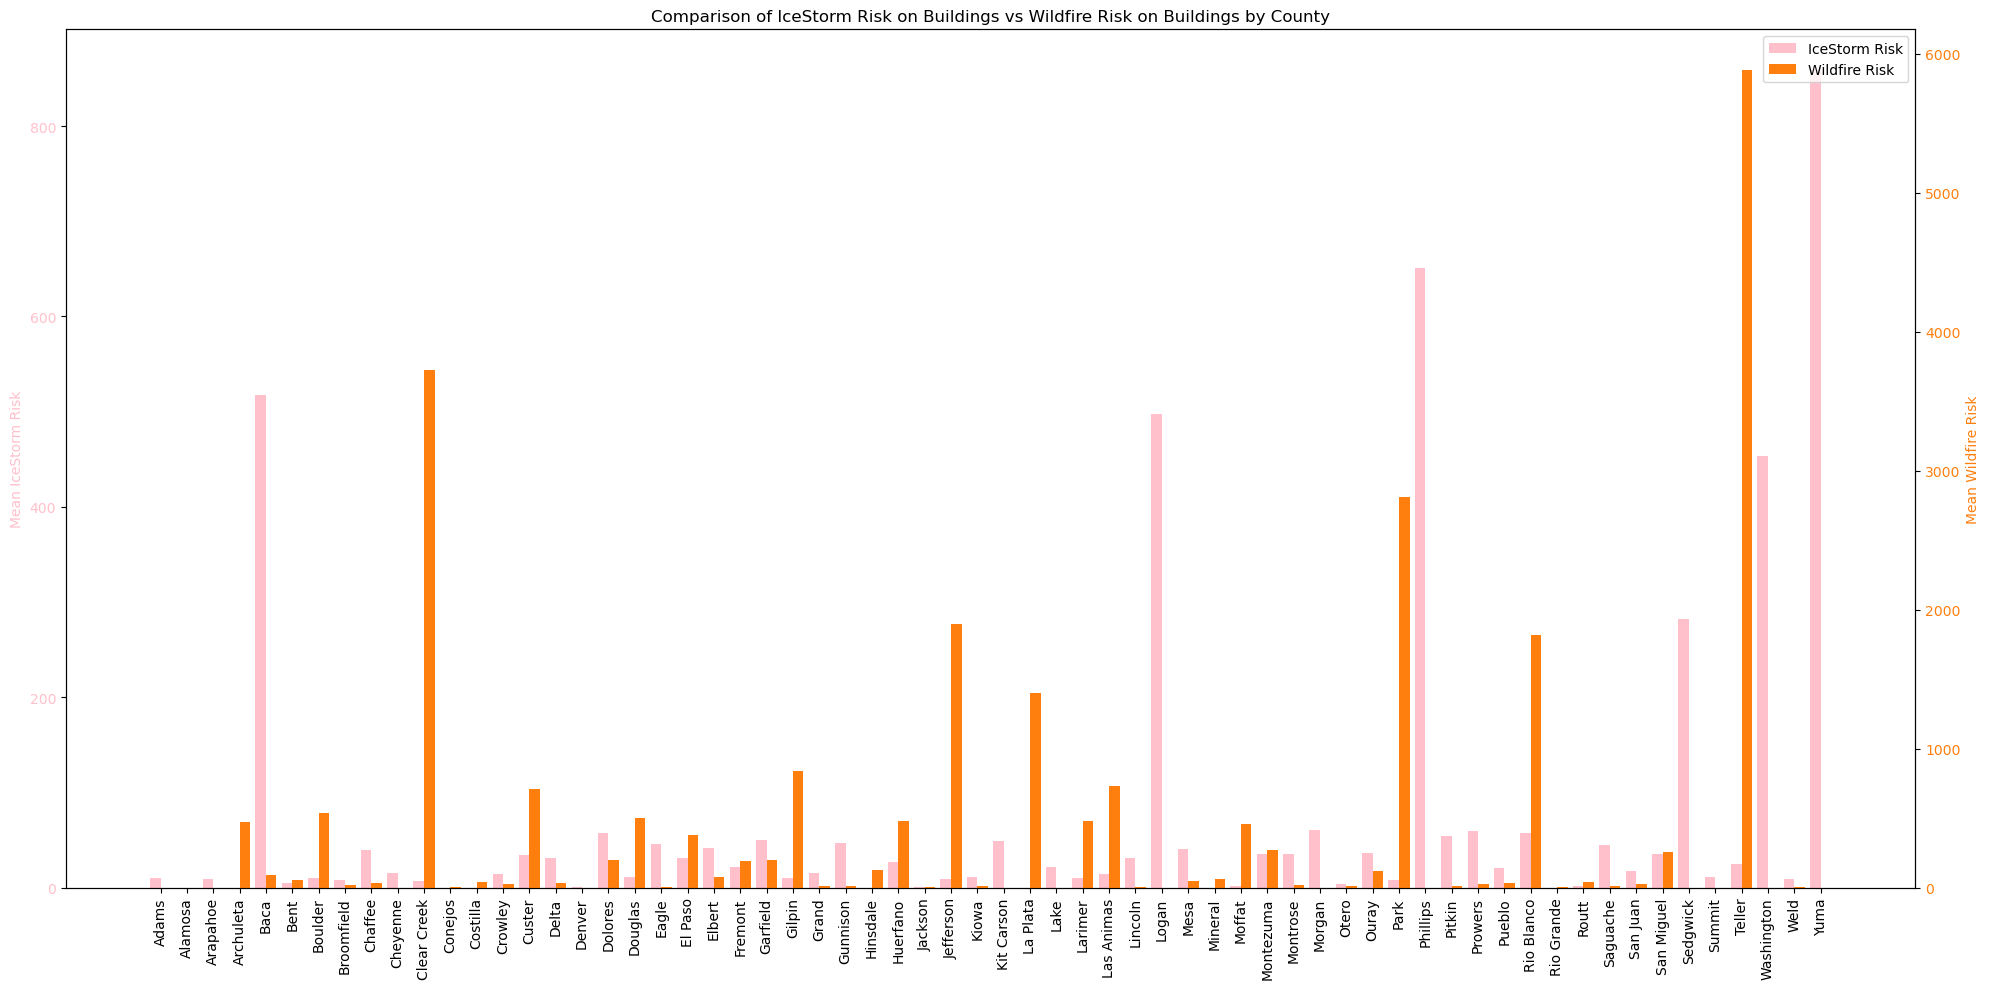

In [31]:
##Creating the visuals 

fig, ax1 = plt.subplots(figsize=(20,10))
x = range(len(grouped_data_co))
labels = grouped_data_co.index.astype(str)


# Left axis - IceStorm
ax1.bar([i - 0.2 for i in x], grouped_data_co['mean_istm'], width=0.4, label='IceStorm Risk', color='pink')
ax1.set_ylabel('Mean IceStorm Risk', color='pink')
ax1.tick_params(axis='y', labelcolor='pink')

# Right axis - Wildfire
ax2 = ax1.twinx()
ax2.bar([i + 0.2 for i in x], grouped_data_co['mean_wfir'], width=0.4, label='Wildfire Risk', color='tab:orange')
ax2.set_ylabel('Mean Wildfire Risk', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# X-axis ticks
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=90)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Comparison of IceStorm Risk on Buildings vs Wildfire Risk on Buildings by County')
plt.tight_layout()
plt.show()

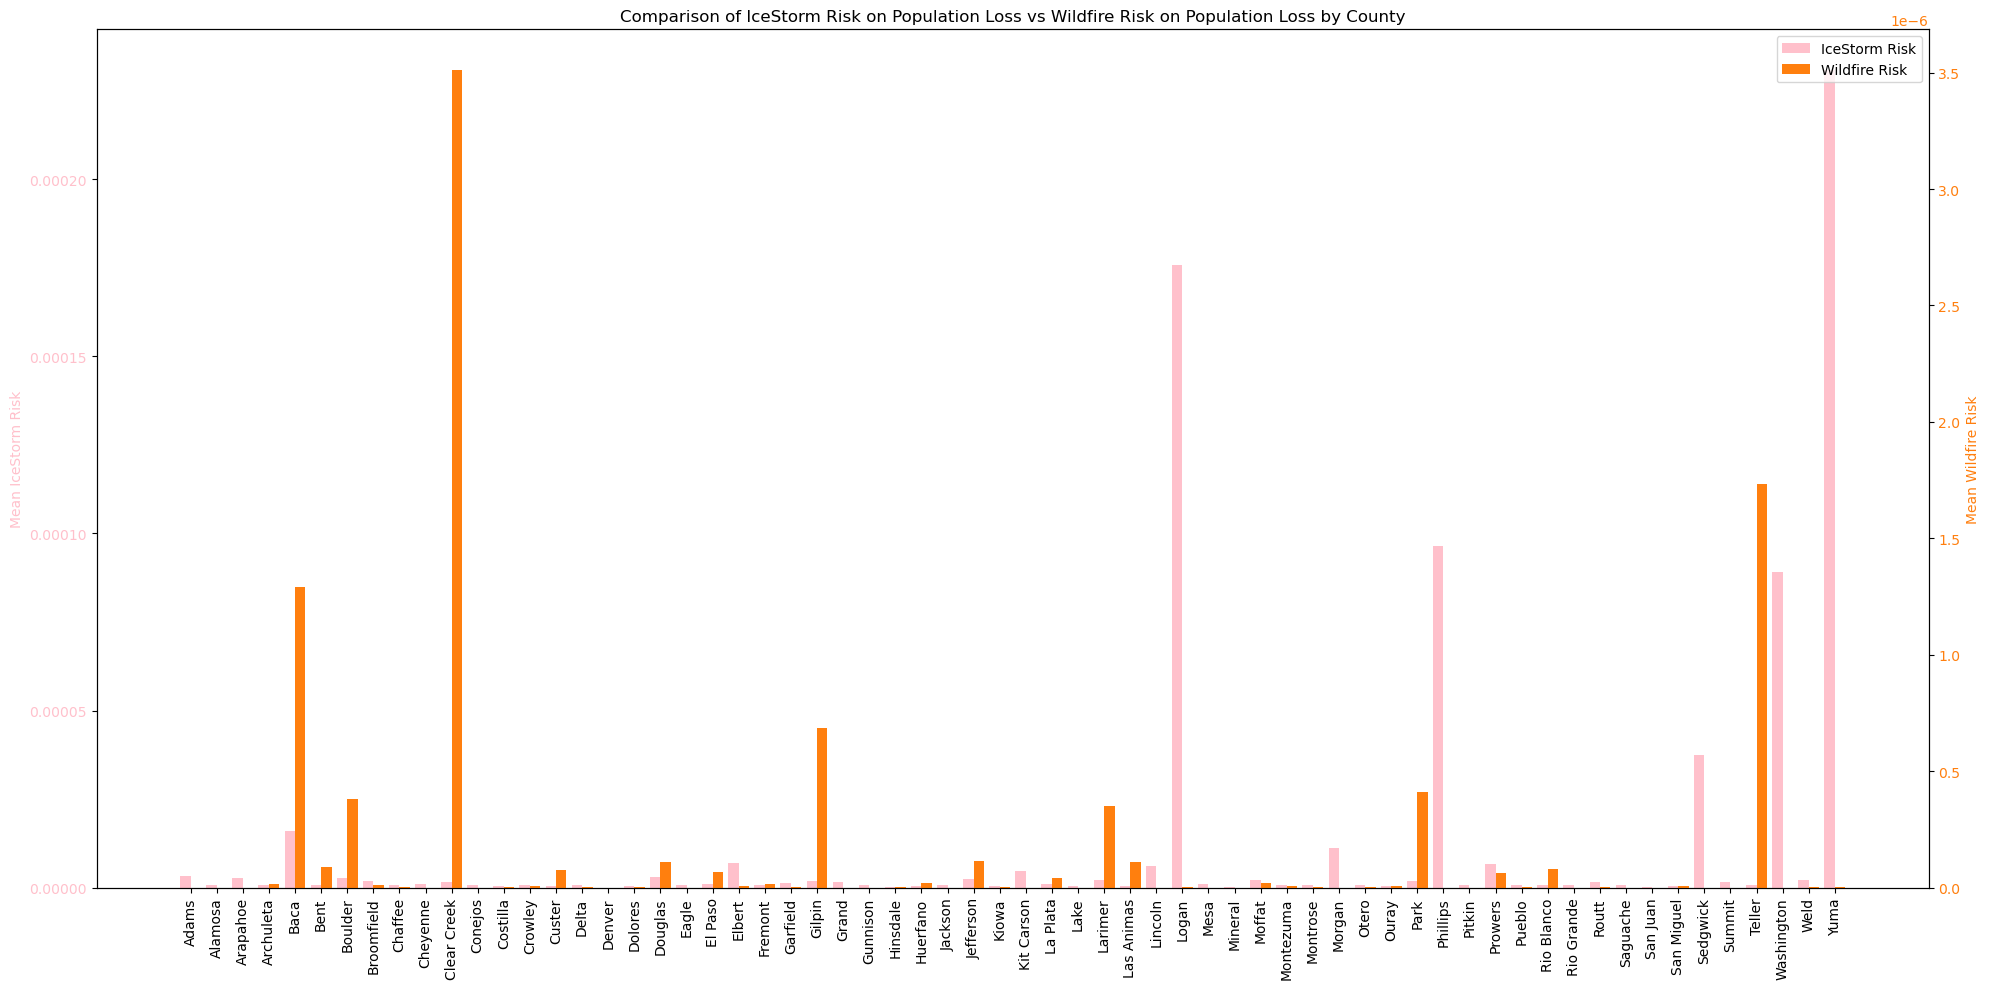

In [33]:
#Creating the second visual based on population loss

#creates the column that multiplies the annual hail frequency by the value loss on buildings 
#both states

#Colorado
complete_data_co2['wildfire_building_risk'] = complete_data_co2['WFIR_AFREQ']*complete_data_co2['WFIR_EALP']
#Montana
complete_data_mo2['wildfire_building_risk'] = complete_data_mo2['WFIR_AFREQ']*complete_data_mo2['WFIR_EALP']

### Creates a column called "icestorm_building_risk" which multiplies ice-storm frequency by value loss on buildings

#Colorado
complete_data_co2['icestorm_building_risk'] = complete_data_co2['ISTM_AFREQ']*complete_data_co2['ISTM_EALP']
#Montana
complete_data_mo2['icestorm_building_risk'] = complete_data_mo2['ISTM_AFREQ']*complete_data_mo2['ISTM_EALP']

##grouping the data for the charts

#Colorado
### Group your data by county
grouped_data_co = complete_data_co2.groupby('COUNTY',as_index=False)

## Run summary mean by county
grouped_data_co = complete_data_co2.groupby('COUNTY').agg(mean_istm=('icestorm_building_risk', 'mean'), 
                                                   mean_wfir=('wildfire_building_risk', 'mean'))

#Montana
### Group your data by county
grouped_data_mo = complete_data_mo2.groupby('COUNTY',as_index=False)

## Run summary mean by county
grouped_data_mo = complete_data_mo2.groupby('COUNTY').agg(mean_istm=('icestorm_building_risk', 'mean'), 
                                                   mean_wfir=('wildfire_building_risk', 'mean'))

#creating the graph!

fig, ax1 = plt.subplots(figsize=(20,10))
x = range(len(grouped_data_co))
labels = grouped_data_co.index.astype(str)


# Left axis - IceStorm
ax1.bar([i - 0.2 for i in x], grouped_data_co['mean_istm'], width=0.4, label='IceStorm Risk', color='pink')
ax1.set_ylabel('Mean IceStorm Risk', color='pink')
ax1.tick_params(axis='y', labelcolor='pink')

# Right axis - Wildfire
ax2 = ax1.twinx()
ax2.bar([i + 0.2 for i in x], grouped_data_co['mean_wfir'], width=0.4, label='Wildfire Risk', color='tab:orange')
ax2.set_ylabel('Mean Wildfire Risk', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# X-axis ticks
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=90)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Comparison of IceStorm Risk on Population Loss vs Wildfire Risk on Population Loss by County')
plt.tight_layout()
plt.show()